[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1kLziHGsxQNJukAyY9J6HhHl3qC4tyobI?usp=sharing)


# **Optimización De Funciones**
--------------------------------------------------------------------------------

### Importaciones necesarias

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sp
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact


# ***Funciones Univariable***
--------------------------------------------------------------------------------

## **Método de Bisección**
Para calcular Raíces

In [ ]:
def biseccion(a, b, error, num_iteraciones):

    f_a = funcion(a)
    f_b = funcion(b)

    if f_a * f_b >= 0:
      raise ValueError("La función no cumple con el requisito de cambiar de signo en el intervalo [a, b].")

    iteracion_data = []
    iteracion=0
    punto_medio = 0
    error_actual=1e6
    inicial=a
    final=b

    while error_actual > error or iteracion < num_iteraciones:

        punto_medio = (a + b) / 2
        error_actual=np.abs((np.abs(b) - np.abs(a)))
        f_a = funcion(a)
        f_b = funcion(b)
        f_punto_medio=funcion(punto_medio)

        iteracion_data.append([iteracion+1, a, b, punto_medio, f_a, f_b, f_punto_medio, error_actual])


        if f_punto_medio * f_a == 0:
            break
        elif f_punto_medio * f_a < 0:
            b = punto_medio
        else:
            a = punto_medio

        iteracion += 1

    print("\n\n--------------RAIZ ENCONTRADA--------------\n", punto_medio)
    print("Con punto inicial ", inicial)
    print("Con punto final ", final)

    # Graficando el resultado
    # Rango de valores X y Y
    x = np.linspace(-10, 10, 100)
    y = funcion(x)

    plt.figure(figsize=(8, 6))
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Gráfico de la función - Método de Bisección')
    plt.plot(x, y, label=f'Función: Y = {funcion_str}')
    plt.axhline(0, color='black', linewidth=1)  # Línea del eje x
    plt.axvline(0, color='black', linewidth=1)  # Línea del eje y
    plt.axvline(punto_medio, color='black', linewidth=1, linestyle='--') # Línea de la raiz
    plt.plot(punto_medio, 0, 'ro', linewidth=1, label=f"Raíz: X = {round(punto_medio, 2)}")
    #plt.ylim(-20, 20)  # Establecer límites del eje y
    plt.legend()
    plt.grid()
    plt.show()

    # Recopilando resultados en un Dataset
    columns = ["Iteración", "a", "b", "Punto medio", "f(a)", "f(b)", "f(Punto medio)", "Error"]
    df = pd.DataFrame(iteracion_data)
    df.columns=columns

    return df

def funcion(x):
    return eval(funcion_str)




--------------RAIZ ENCONTRADA--------------
 0.8514578448732378
Con punto inicial  -10
Con punto final  20


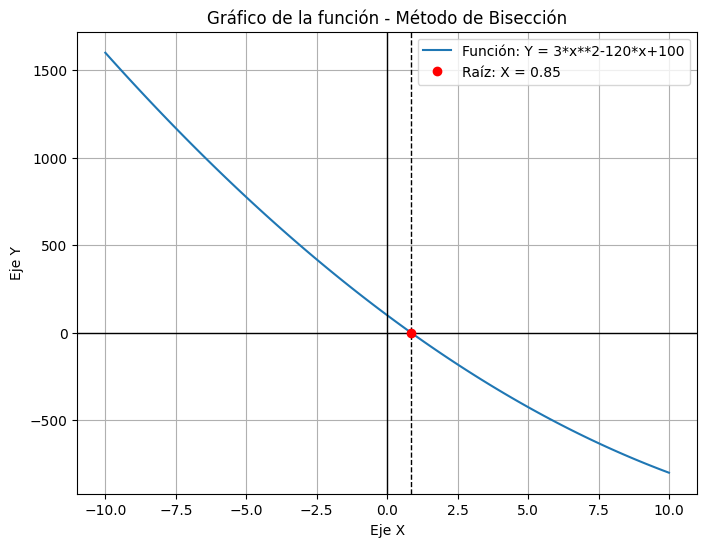

In [ ]:
# Ingresando parametros
'''
funcion_str = input("Ingresa la función (Utiliza 'x' como variable independiente, y la notación Ejm: 3*x**2+2*x+10 )")
a = float(input("Ingresa el valor del punto inicial 'a' (Mas bajo): "))
b = float(input("Ingresa el valor del punto final 'b' (Mas alto): : "))
'''
# Parámetros por defecto. Borre en caso que quiera ingresar otra función
funcion_str ="3*x**2-120*x+100"
a=-10
b=20

error = 1e-6
num_iteraciones = 100

try:
    resultados = biseccion(a, b, error, num_iteraciones)

except Exception as e:
    print("Hubo un error al realizar las operaciones:", e)


### Datos recopilados

----------DATOS RECOPILADOS--------------


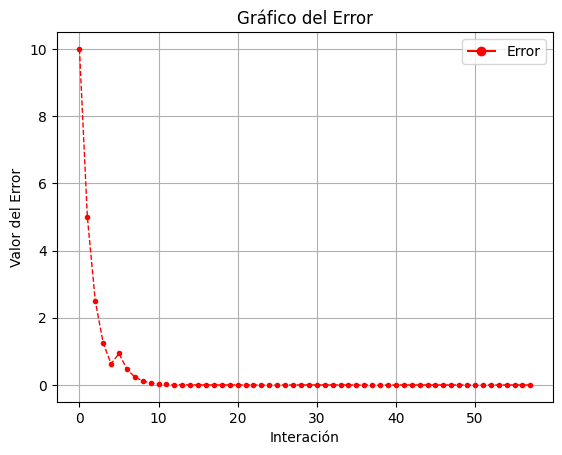

,Iteración,a,b,Punto medio,f(a),f(b),f(Punto medio),Error
0,1,-10.000000,20.000000,5.000000,1.600000e+03,-1.100000e+03,-4.250000e+02,1.000000e+01
1,2,-10.000000,5.000000,-2.500000,1.600000e+03,-4.250000e+02,4.187500e+02,5.000000e+00
2,3,-2.500000,5.000000,1.250000,4.187500e+02,-4.250000e+02,-4.531250e+01,2.500000e+00
3,4,-2.500000,1.250000,-0.625000,4.187500e+02,-4.531250e+01,1.761719e+02,1.250000e+00
4,5,-0.625000,1.250000,0.312500,1.761719e+02,-4.531250e+01,6.279297e+01,6.250000e-01
...,...,...,...,...,...,...,...,...
53,54,0.851458,0.851458,0.851458,3.694822e-13,-1.421085e-14,1.705303e-13,3.330669e-15
54,55,0.851458,0.851458,0.851458,1.705303e-13,-1.421085e-14,8.526513e-14,1.665335e-15
55,56,0.851458,0.851458,0.851458,8.526513e-14,-1.421085e-14,4.263256e-14,8.881784e-16
56,57,0.851458,0.851458,0.851458,4.263256e-14,-1.421085e-14,1.421085e-14,4.440892e-16


In [ ]:
print("----------DATOS RECOPILADOS--------------")

# Gráfica del error
error_column = resultados['Error']
fig, ax = plt.subplots()
legend_line, = ax.plot([], [], '-o', color="red", label="Error")
error_column.plot(style='o', markersize=3, color="red")
error_column.plot(style='--', linewidth=1, color="red")
plt.xlabel('Interación')
plt.ylabel('Valor del Error')
plt.title('Gráfico del Error')
plt.legend(handles=[legend_line])
plt.grid()
plt.show()

pd.set_option('display.max_rows', 10)
#resultados=resultados.round(2)
resultados


## **Método de Interpolación Cuadrática**
Para calcular Máximos

In [ ]:
def interpolacion_cuadratica(a, b, c, error, num_iteraciones):

    iteracion_data = []
    iteracion = 0
    maximo = 0
    error_actual = 1e6
    inicial=a
    final=c
    medio=b


    while error_actual > error and iteracion < num_iteraciones:

        f_a = funcion(a)
        f_b = funcion(b)
        f_c = funcion(c)

        # Aplicando la Interpolación cuadrática para el punto medio
        maximo = ((f_a*((b**2)-(c**2))) + (f_b*((c**2)-(a**2))) + (f_c*((a**2)-(b**2)))) / ((2*(f_a*(b-c))) + (2*(f_b*(c-a))) + (2*(f_c*(a-b))))
        f_maximo = funcion(maximo)
        error_actual = np.abs(np.abs(maximo) - np.abs(b))
        iteracion_data.append([iteracion + 1, a, b, c, maximo, f_a, f_b, f_c, f_maximo, error_actual])

        if f_maximo > f_b and maximo > b:
           a=b
           b=maximo

        else:
          c=b
          b=maximo

        iteracion += 1

    print("\n\n--------------MÁXIMO ENCONTRADO--------------\n", maximo)
    print("Con punto inicial ", inicial)
    print("Con punto medio ", medio)
    print("Con punto final ", final)

    # Graficando el resultado
    # Rango de valores X y Y
    x = np.linspace(-10, 10, 100)
    y = funcion(x)

    plt.figure(figsize=(8, 6))
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Gráfico de la función - Método de Interpolación Cuadrática')
    plt.plot(x, y, label=f'Función: Y = {funcion_str}')
    plt.axhline(0, color='black', linewidth=1)  # Línea del eje x
    plt.axvline(0, color='black', linewidth=1)  # Línea del eje y
    plt.axhline(f_maximo, color='black', linewidth=1, linestyle='--') # Línea del Máximo
    plt.axvline(maximo, color='black', linewidth=1, linestyle='--') # Línea del Máximo
    plt.plot(maximo, f_maximo, 'ro', linewidth=1, label=f"Máximo: X = {round(maximo, 2)}, Y = {round(f_maximo, 2)}")
    #plt.ylim(-20, 20)  # Establecer límites del eje y
    plt.legend()
    plt.grid()
    plt.show()

    # Recopilando resultados en un Dataset
    columns = ["Iteración", "a", "b", "c", "Punto medio", "f(a)", "f(b)", "f(c)", "f(Punto medio)", "Error"]
    df = pd.DataFrame(iteracion_data)
    df.columns=columns

    return df

def funcion(x):
    return eval(funcion_str)


In [ ]:
# Ingresando parametros, asumiendo que los intervalos hagan parte de un región unimodal de la función
'''
funcion_str = input("Ingresa la función (Utiliza 'x' como variable independiente, y la notación Ejm: 2*np.sin(x)-x**2/10 )")
a = float(input("Ingresa el valor del punto inicial 'a' (Mas bajo): "))
b = float(input("Ingresa el valor del punto medio 'b': "))
c = float(input("Ingresa el valor del punto final 'c' (Mas alto): "))
'''
# Parámetros por defecto. Borre en caso que quiera ingresar otra función
funcion_str = "2*np.sin(x)-x**2/10"
a=0
b=1
c=4

error = 1e-6
num_iteraciones = 100

try:

  resultados = interpolacion_cuadratica(a, b, c, error, num_iteraciones)

except Exception as e:
    print("Hubo un error al realizar las operaciones:", e)


Hubo un error al realizar las operaciones: name 'np' is not defined


### Datos recopilados

----------DATOS RECOPILADOS--------------


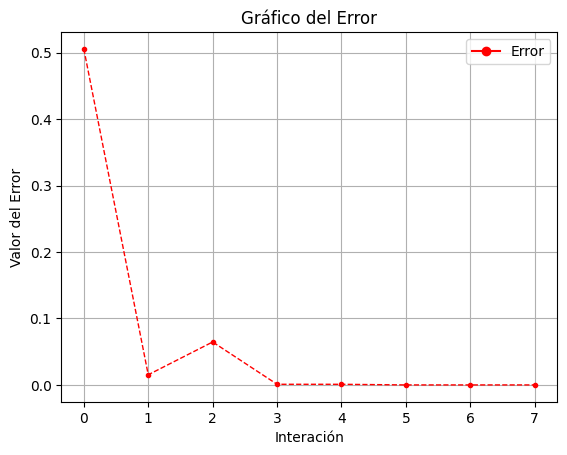

,Iteración,a,b,c,Punto medio,f(a),f(b),f(c),f(Punto medio),Error
0,1,0.000000,1.000000,4.000000,1.505535,0.000000,1.582942,-3.113605,1.769079,5.055349e-01
1,2,1.000000,1.505535,4.000000,1.490253,1.582942,1.769079,-3.113605,1.771431,1.528212e-02
2,3,1.000000,1.490253,1.505535,1.425636,1.582942,1.771431,1.769079,1.775722,6.461680e-02
3,4,1.000000,1.425636,1.490253,1.426602,1.582942,1.775722,1.771431,1.775725,9.655683e-04
4,5,1.425636,1.426602,1.490253,1.427548,1.775722,1.775725,1.771431,1.775726,9.467883e-04
5,6,1.426602,1.427548,1.490253,1.427551,1.775725,1.775726,1.771431,1.775726,2.305119e-06
6,7,1.427548,1.427551,1.490253,1.427552,1.775726,1.775726,1.771431,1.775726,1.157085e-06
7,8,1.427551,1.427552,1.490253,1.427552,1.775726,1.775726,1.771431,1.775726,5.526185e-09


In [ ]:
print("----------DATOS RECOPILADOS--------------")

# Gráfica del error
error_column = resultados['Error']
fig, ax = plt.subplots()
legend_line, = ax.plot([], [], '-o', color="red", label="Error")
error_column.plot(style='o', markersize=3, color="red")
error_column.plot(style='--', linewidth=1, color="red")
plt.xlabel('Interación')
plt.ylabel('Valor del Error')
plt.title('Gráfico del Error')
plt.legend(handles=[legend_line])
plt.grid()
plt.show()

pd.set_option('display.max_rows', 10)
#resultados=resultados.round(2)
resultados


## **Método de la Falsa Posición**
Para calcular Raíces

In [ ]:
def falsa_posicion(a, b, error, num_iteraciones):

    f_a = funcion(a)
    f_b = funcion(b)

    if f_a * f_b >= 0:
      raise ValueError("La función no cumple con el requisito de cambiar de signo en el intervalo [a, b].")

    iteracion_data = []
    iteracion = 0
    punto_medio = 0
    error_actual = 1e6
    inicial=a
    final=b

    while error_actual > error and iteracion < num_iteraciones:

        f_a = funcion(a)
        f_b = funcion(b)

        # Aplicando la Falsa posicion
        punto_medio = b - (f_b*(a-b))/(f_a-f_b)
        f_punto_medio = funcion(punto_medio)
        error_actual = np.abs(np.abs(b) - np.abs(a))

        iteracion_data.append([iteracion + 1, a, b, punto_medio, f_a, f_b, f_punto_medio, error_actual])

        if f_punto_medio * f_a == 0:
            break
        elif f_punto_medio * f_a < 0:
            b = punto_medio
        else:
            a = punto_medio

        iteracion += 1

    print("\n\n--------------RAIZ ENCONTRADA--------------\n", punto_medio)
    print("Con punto inicial ", inicial)
    print("Con punto final ", final)

    # Graficando el resultado
    # Rango de valores X y Y
    x = np.linspace(-10, 10, 100)
    y = funcion(x)

    plt.figure(figsize=(8, 6))
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Gráfico de la función - Método de la Falsa Posición')
    plt.plot(x, y, label=f'Función: Y = {funcion_str}')
    plt.axhline(0, color='black', linewidth=1)  # Línea del eje x
    plt.axvline(0, color='black', linewidth=1)  # Línea del eje y
    plt.axvline(punto_medio, color='black', linewidth=1, linestyle='--') # Línea de la raíz
    plt.plot(punto_medio, f_punto_medio, 'ro', linewidth=1, label=f"Raíz: X = {round(punto_medio, 2)}")
    #plt.ylim(-20, 20)  # Establecer límites del eje y
    plt.legend()
    plt.grid()
    plt.show()

    # Recopilando resultados en un Dataset
    columns = ["Iteración", "a", "b", "Punto medio", "f(a)", "f(b)", "f(Punto medio)", "Error"]
    df = pd.DataFrame(iteracion_data)
    df.columns=columns

    return df

def funcion(x):
    return eval(funcion_str)




--------------RAIZ ENCONTRADA--------------
 0.8514578448732378
Con punto inicial  -10
Con punto final  20


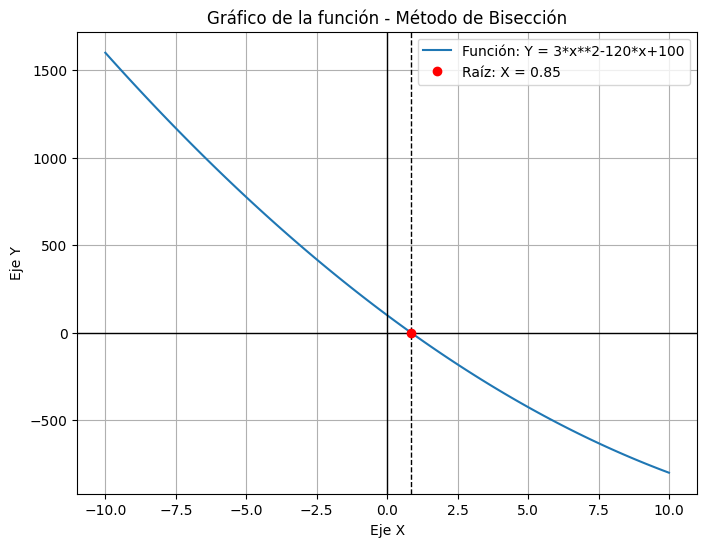

In [ ]:
# Ingresando parametros
'''
funcion_str = input("Ingresa la función (Utiliza 'x' como variable independiente, y la notación Ejm: 3*x**2-120*x+100 )")
a = float(input("Ingresa el valor del punto inicial 'a' (Mas bajo): "))
b = float(input("Ingresa el valor del punto final 'b' (Mas alto): "))
'''
# Parámetros por defecto. Borre en caso que quiera ingresar otra función
funcion_str ="3*x**2-120*x+100"
a=-10
b=20

error = 1e-6
num_iteraciones = 100

try:

    resultados = falsa_posicion(a, b, error, num_iteraciones)

except Exception as e:
    print("Hubo un error al realizar las operaciones:", e)


### Datos recopilados

----------DATOS RECOPILADOS--------------


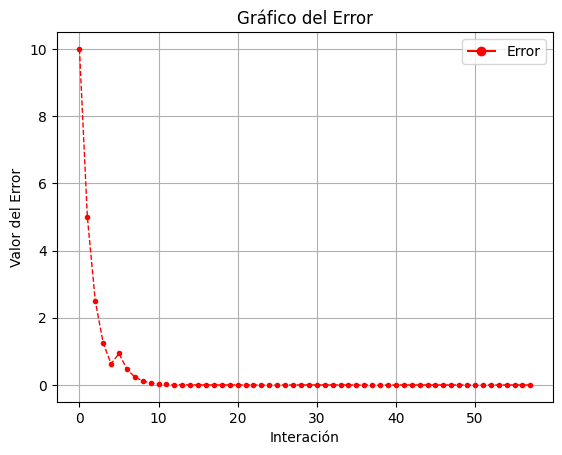

,Iteración,a,b,Punto medio,f(a),f(b),f(Punto medio),Error
0,1,-10.000000,20.000000,5.000000,1.600000e+03,-1.100000e+03,-4.250000e+02,1.000000e+01
1,2,-10.000000,5.000000,-2.500000,1.600000e+03,-4.250000e+02,4.187500e+02,5.000000e+00
2,3,-2.500000,5.000000,1.250000,4.187500e+02,-4.250000e+02,-4.531250e+01,2.500000e+00
3,4,-2.500000,1.250000,-0.625000,4.187500e+02,-4.531250e+01,1.761719e+02,1.250000e+00
4,5,-0.625000,1.250000,0.312500,1.761719e+02,-4.531250e+01,6.279297e+01,6.250000e-01
...,...,...,...,...,...,...,...,...
53,54,0.851458,0.851458,0.851458,3.694822e-13,-1.421085e-14,1.705303e-13,3.330669e-15
54,55,0.851458,0.851458,0.851458,1.705303e-13,-1.421085e-14,8.526513e-14,1.665335e-15
55,56,0.851458,0.851458,0.851458,8.526513e-14,-1.421085e-14,4.263256e-14,8.881784e-16
56,57,0.851458,0.851458,0.851458,4.263256e-14,-1.421085e-14,1.421085e-14,4.440892e-16


In [ ]:
print("----------DATOS RECOPILADOS--------------")

# Gráfica del error
error_column = resultados['Error']
fig, ax = plt.subplots()
legend_line, = ax.plot([], [], '-o', color="red", label="Error")
error_column.plot(style='o', markersize=3, color="red")
error_column.plot(style='--', linewidth=1, color="red")
plt.xlabel('Interación')
plt.ylabel('Valor del Error')
plt.title('Gráfico del Error')
plt.legend(handles=[legend_line])
plt.grid()
plt.show()

pd.set_option('display.max_rows', 10)
#resultados=resultados.round(2)
resultados



## **Método Búsqueda de la Sección Dorada**

### Para calcular el Máximo

In [ ]:
def maximo_seccion_dorada(a, b, error, num_iteraciones):

    constante=0.618
    iteracion_data = []
    iteracion = 0
    punto_medio = 0
    error_actual = 1e6
    inicial=a
    final=b

    while error_actual > error and iteracion < num_iteraciones:

        # Aplicando la sección dorada
        d = constante*(b-a)
        x1=a+d
        x2=b-d

        f_x1 = funcion(x1)
        f_x2 = funcion(x2)
        error_actual = np.abs(np.abs(x2) - np.abs(x1))

        iteracion_data.append([iteracion + 1, a, b, d, x1, x2, f_x1,f_x2, error_actual])

        if f_x1 < f_x2:
           a=a
           b=x1

        else:
          b=b
          a=x2

        iteracion += 1

    # Al hacer la aproximación, tanto el punto "a" como el "b" se acercan al valor máximo. Por lo tanto, se seleccionará el punto "a"
    maximo=a
    f_maximo= funcion(maximo)

    print("\n\n--------------MÁXIMO ENCONTRADO--------------\n", a)
    print("Con punto inicial ", inicial)
    print("Con punto final ", final)

    # Graficando el resultado
    # Rango de valores X y Y
    x = np.linspace(-10, 10, 100)
    y = funcion(x)

    plt.figure(figsize=(8, 6))
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Gráfico de la función - Método Búsqueda de la Sección Dorada Máximo')
    plt.plot(x, y, label=f'Función: Y = {funcion_str}')
    plt.axhline(0, color='black', linewidth=1)  # Línea del eje x
    plt.axvline(0, color='black', linewidth=1)  # Línea del eje y
    plt.axhline(f_maximo, color='black', linewidth=1, linestyle='--') # Línea del Máximo
    plt.axvline(a, color='black', linewidth=1, linestyle='--') # Línea del máximo
    plt.plot(maximo, f_maximo, 'ro', linewidth=1, label=f"Máximo: X = {round(maximo, 2)}, Y = {round(f_maximo, 2)}")
    #plt.ylim(-20, 20)  # Establecer límites del eje y
    plt.legend()
    plt.grid()
    plt.show()

    # Recopilando resultados en un Dataset
    columns = ["Iteración", "a", "b", "d", "X1", "X2", "f(X1)", "f(X2)", "Error"]
    df = pd.DataFrame(iteracion_data)
    df.columns=columns

    return df

def funcion(x):
    return eval(funcion_str)




--------------MÁXIMO ENCONTRADO--------------
 1.4275511341175866
Con punto inicial  0
Con punto final  4


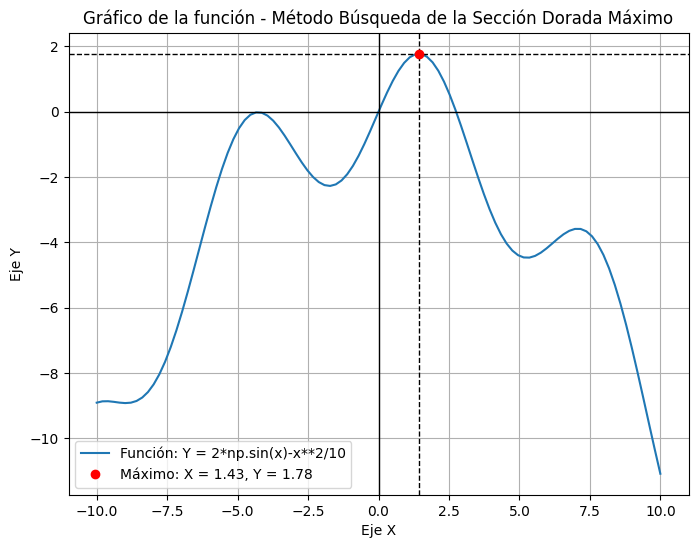

In [ ]:
# Ingresando parametros, asumiendo que los intervalos hagan parte de un región unimodal de la función
'''
funcion_str = input("Ingresa la función (Utiliza 'x' como variable independiente, y la notación Ejm: 2*np.sin(x)-x**2/10 )")
a = float(input("Ingresa el valor del punto inicial 'a' (Mas bajo): "))
b = float(input("Ingresa el valor del punto final 'b' (Mas alto): "))
'''
# Parámetros por defecto. Borre en caso que quiera ingresar otra función
funcion_str = "2*np.sin(x)-x**2/10"
a=0
b=4

error = 1e-6
num_iteraciones = 100

try:

  resultados = maximo_seccion_dorada(a, b, error, num_iteraciones)

except Exception as e:
    print("Hubo un error al realizar las operaciones:", e)


### Datos recopilados

----------DATOS RECOPILADOS--------------


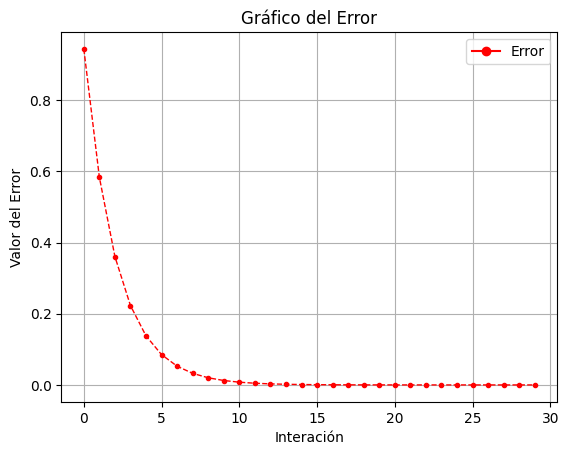

,Iteración,a,b,d,X1,X2,f(X1),f(X2),Error
0,1,0.000000,4.000000,2.472000,2.472000,1.528000,0.630255,1.764690,9.440000e-01
1,2,0.000000,2.472000,1.527696,1.527696,0.944304,1.764757,1.531007,5.833920e-01
2,3,0.944304,2.472000,0.944116,1.888420,1.527884,1.543347,1.764716,3.605363e-01
3,4,0.944304,1.888420,0.583464,1.527768,1.304956,1.764741,1.759453,2.228114e-01
4,5,1.304956,1.888420,0.360581,1.665537,1.527840,1.713630,1.764726,1.376974e-01
...,...,...,...,...,...,...,...,...,...
25,26,1.427533,1.427557,0.000015,1.427548,1.427542,1.775726,1.775726,5.619321e-06
26,27,1.427542,1.427557,0.000009,1.427551,1.427548,1.775726,1.775726,3.472741e-06
27,28,1.427548,1.427557,0.000006,1.427553,1.427551,1.775726,1.775726,2.146154e-06
28,29,1.427548,1.427553,0.000003,1.427551,1.427550,1.775726,1.775726,1.326323e-06


In [ ]:
print("----------DATOS RECOPILADOS--------------")

# Gráfica del error
error_column = resultados['Error']
fig, ax = plt.subplots()
legend_line, = ax.plot([], [], '-o', color="red", label="Error")
error_column.plot(style='o', markersize=3, color="red")
error_column.plot(style='--', linewidth=1, color="red")
plt.xlabel('Interación')
plt.ylabel('Valor del Error')
plt.title('Gráfico del Error')
plt.legend(handles=[legend_line])
plt.grid()
plt.show()

pd.set_option('display.max_rows', 10)
#resultados=resultados.round(2)
resultados


### Para calcular el Mínimo

In [ ]:
def minimo_seccion_dorada(a, b, error, num_iteraciones):

    c_razon_dorada=0.618
    iteracion_data = []
    iteracion = 0
    punto_medio = 0
    error_actual = 1e6
    inicial=a
    final=b

    while error_actual > error and iteracion < num_iteraciones:

        # Aplicando la sección dorada
        d = c_razon_dorada*(b-a)
        x1=a+d
        x2=b-d

        f_x1 = funcion(x1)
        f_x2 = funcion(x2)
        error_actual = np.abs(np.abs(x2) - np.abs(x1))

        iteracion_data.append([iteracion + 1, a, b, d, x1, x2, f_x1,f_x2, error_actual])

        if f_x1 > f_x2:
           a=a
           b=x1

        else:
          b=b
          a=x2

        iteracion += 1

    # Al hacer la aproximación, tanto el punto "a" como el "b" se acercan al valor mínimo. Por lo tanto, se seleccionará el punto "a"
    minimo=a
    f_minimo = funcion(minimo)

    print("\n\n--------------MÍNIMO ENCONTRADO--------------\n", a)
    print("Con punto inicial ", inicial)
    print("Con punto final ", final)

    # Graficando el resultado
    # Rango de valores X y Y
    x = np.linspace(-10, 10, 100)
    y = funcion(x)

    plt.figure(figsize=(8, 6))
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Gráfico de la función - Método Búsqueda de la Sección Dorada Mínimo')
    plt.plot(x, y, label=f'Función: Y = {funcion_str}')
    plt.axhline(0, color='black', linewidth=1)  # Línea del eje x
    plt.axvline(0, color='black', linewidth=1)  # Línea del eje y
    plt.axhline(f_minimo, color='black', linewidth=1, linestyle='--') # Línea del minimo
    plt.axvline(minimo, color='black', linewidth=1, linestyle='--') # Línea del minimo
    plt.plot(minimo, f_minimo, 'ro', linewidth=1, label=f"Mínimo: X = {round(minimo, 2)}, Y = {round(f_minimo, 2)}")
    #plt.ylim(-20, 20)  # Establecer límites del eje y
    plt.legend()
    plt.grid()
    plt.show()

    # Recopilando resultados en un Dataset
    columns = ["Iteración", "a", "b", "d", "X1", "X2", "f(X1)", "f(X2)", "Error"]
    df = pd.DataFrame(iteracion_data)
    df.columns=columns

    return df

def funcion(x):
    return eval(funcion_str)




--------------MÍNIMO ENCONTRADO--------------
 -1.7463305268456835
Con punto inicial  -4
Con punto final  0


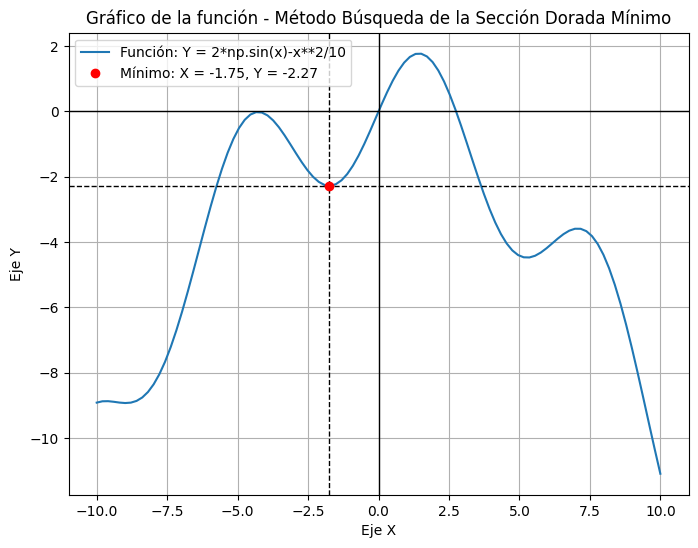

In [ ]:
# Ingresando parametros, asumiendo que los intervalos hagan parte de un región unimodal de la función
'''
funcion_str = input("Ingresa la función (Utiliza 'x' como variable independiente, y la notación Ejm: 2*np.sin(x)-x**2/10 )")
a = float(input("Ingresa el valor del punto inicial 'a' (Mas bajo): "))
b = float(input("Ingresa el valor del punto final 'b' (Mas alto): "))
'''
# Parámetros por defecto. Borre en caso que quiera ingresar otra función
funcion_str = "2*np.sin(x)-x**2/10"
a=-4
b=0

error = 1e-6
num_iteraciones = 100

try:

  resultados = minimo_seccion_dorada(a, b, error, num_iteraciones)

except Exception as e:
    print("Hubo un error al realizar las operaciones:", e)


### Datos recopilados

----------DATOS RECOPILADOS--------------


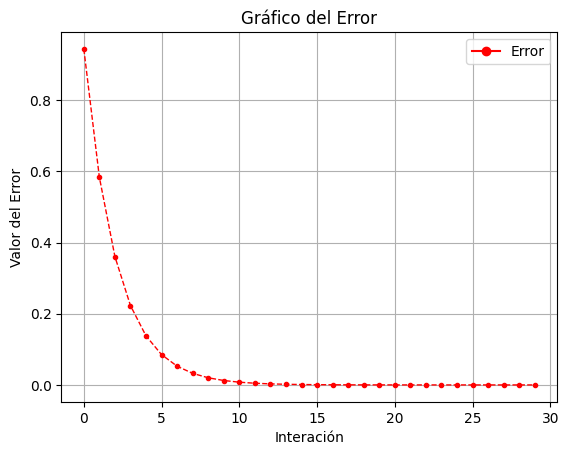

,Iteración,a,b,d,X1,X2,f(X1),f(X2),Error
0,1,-4.000000,0.000000,2.472000,-1.528000,-2.472000,-2.231647,-1.852412,9.440000e-01
1,2,-2.472000,0.000000,1.527696,-0.944304,-1.527696,-1.709349,-2.231528,5.833920e-01
2,3,-2.472000,-0.944304,0.944116,-1.527884,-1.888420,-2.231602,-2.256573,3.605363e-01
3,4,-2.472000,-1.527884,0.583464,-1.888536,-2.111348,-2.256545,-2.160629,2.228114e-01
4,5,-2.111348,-1.527884,0.360581,-1.750767,-1.888464,-2.274216,-2.256563,1.376974e-01
...,...,...,...,...,...,...,...,...,...
25,26,-1.746338,-1.746314,0.000015,-1.746324,-1.746329,-2.274234,-2.274234,5.619321e-06
26,27,-1.746338,-1.746324,0.000009,-1.746329,-1.746333,-2.274234,-2.274234,3.472741e-06
27,28,-1.746333,-1.746324,0.000006,-1.746327,-1.746329,-2.274234,-2.274234,2.146154e-06
28,29,-1.746333,-1.746327,0.000003,-1.746329,-1.746331,-2.274234,-2.274234,1.326323e-06


In [ ]:
print("----------DATOS RECOPILADOS--------------")

# Gráfica del error
error_column = resultados['Error']
fig, ax = plt.subplots()
legend_line, = ax.plot([], [], '-o', color="red", label="Error")
error_column.plot(style='o', markersize=3, color="red")
error_column.plot(style='--', linewidth=1, color="red")
plt.xlabel('Interación')
plt.ylabel('Valor del Error')
plt.title('Gráfico del Error')
plt.legend(handles=[legend_line])
plt.grid()
plt.show()

pd.set_option('display.max_rows', 10)
#resultados=resultados.round(2)
resultados


## **Método de Newton - Raphson**

### Para calcular la Raíz

In [ ]:
def Newton_Raphson_raiz(a, funcion_str, error, num_iteraciones):

    # Símbolo de variable x para derivar la función en terminos de x
    x = sp.symbols('x')

    # Convertir la cadena de texto en una función
    funcion_original = sp.sympify(funcion_str)

    iteracion_data = []
    iteracion = 0
    error_actual = 1e6
    inicial=a

    while error_actual > error and iteracion < num_iteraciones:

        # Newton - Raphson, para calcular la raiz se usa el criterio de la primera derivada
        d_x=sp.diff(funcion_original, x)

        f_x= round(float(funcion_original.subs(x, a)), 5)
        f_d_x=round(float(d_x.subs(x, a)), 5)

        b=a-(f_x/f_d_x)

        if iteracion > 0:
            error_actual = np.abs((np.abs(b) - np.abs(a))/np.abs(b))

        iteracion_data.append([iteracion + 1, a, f_x, f_d_x, error_actual])

        a=b # El nuevo valor del punto será el siguiente
        iteracion += 1


    # Al hacer la aproximación, el punto "a" es el que se acercan a la raíz.
    raiz=a
    f_raiz=funcion_original.subs(x, a)

    print("\n\n--------------RAÍZ ENCONTRADA--------------\n", a)
    print("Con punto inicial ", inicial)

    # Graficando el resultado
    # Rango de valores X y Y
    grafica_funcion= sp.lambdify(x, funcion_original, 'numpy')
    eje_x = np.linspace(-10, 10, 100)
    eje_y = grafica_funcion(eje_x)

    plt.figure(figsize=(8, 6))
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Gráfico de la función - Método de Newton Raphson - Raiz')
    plt.plot(eje_x, eje_y, label=f'Función: Y = {funcion_original}')
    plt.axhline(0, color='black', linewidth=1)  # Línea del eje x
    plt.axvline(0, color='black', linewidth=1)  # Línea del eje y
    plt.axvline(raiz, color='black', linewidth=1, linestyle='--') # Línea de la raíz
    plt.plot(raiz, f_raiz, 'ro', linewidth=1, label=f"Raíz= {round(raiz, 2)}")
    #plt.ylim(-20, 20)  # Establecer los límites del eje y
    plt.legend()
    plt.grid()
    plt.show()

    # Recopilando resultados en un Dataset
    columns = ["Iteración", "x", "f(x)", "'f(x)", "Error"]
    df = pd.DataFrame(iteracion_data)
    df.columns=columns

    return df




--------------RAÍZ ENCONTRADA--------------
 0.8514578358386847
Con punto inicial  5


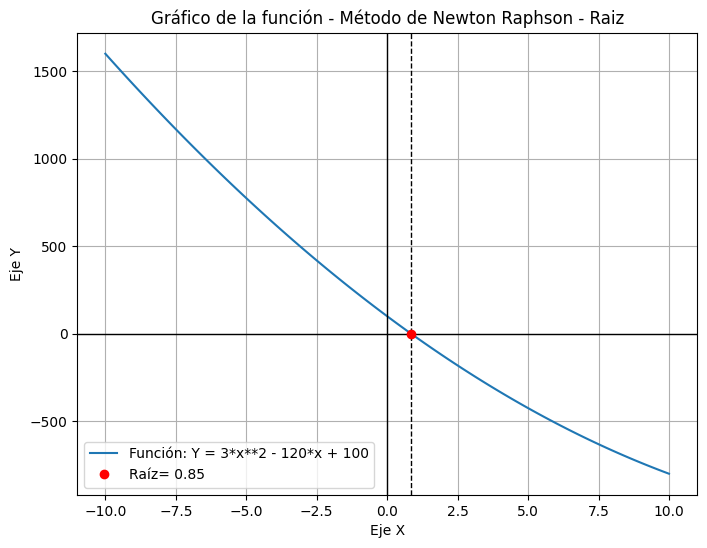

In [ ]:
# Ingresando parametros
'''
funcion_str = input("Ingresa la función (Utiliza 'x' como variable independiente, y la notación Ejm: 3*x**2-120*x+100 )")
a = float(input("Ingresa el valor del punto inicial 'a': "))
'''
# Parámetros por defecto. Borre en caso que quiera ingresar otra función
funcion_str ="3*x**2-120*x+100"
a=5

error = 0
num_iteraciones = 100

try:

  resultados = Newton_Raphson_raiz(a, funcion_str, error, num_iteraciones)

except Exception as e:
    print("Hubo un error al realizar las operaciones:", e)


### Datos recopilados

----------DATOS RECOPILADOS--------------


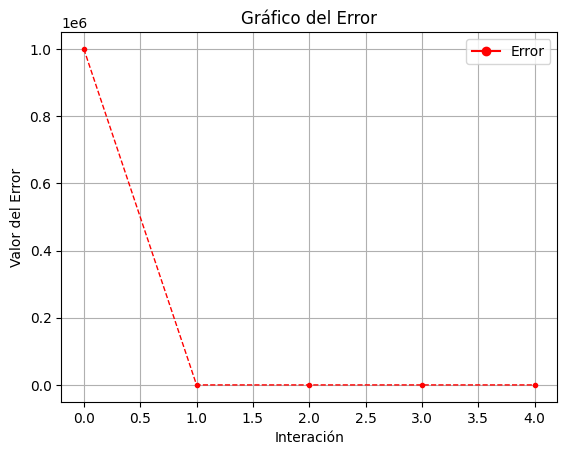

,Iteración,x,f(x),'f(x),Error
0,1.0,5.000000,-425.00000,-90.00000,1000000.000000
1,2.0,0.277778,66.89815,-118.33333,0.670534
2,3.0,0.843114,0.95881,-114.94131,0.009797
3,4.0,0.851456,0.00021,-114.89126,0.000002
4,5.0,0.851458,0.00000,-114.89125,0.000000


In [ ]:
print("----------DATOS RECOPILADOS--------------")

# Gráfica del error
resultados=resultados.astype(float)
error_column = resultados['Error']
fig, ax = plt.subplots()
legend_line, = ax.plot([], [], '-o', color="red", label="Error")
error_column.plot(style='o', markersize=3, color="red")
error_column.plot(style='--', linewidth=1, color="red")
plt.xlabel('Interación')
plt.ylabel('Valor del Error')
plt.title('Gráfico del Error')
plt.legend(handles=[legend_line])
plt.grid()
plt.show()

pd.set_option('display.max_rows', 10)
#resultados=resultados.round(2)
resultados



### Para calcular Máximos o Mínimos
El método de Newton - Raphson funciona tanto para máximos, como para mínimos. Dependerá del punto X inicial que se seleccione, ya que se acercará al punto de inflexión de la función que está mas cerca. Estos puntos pueden ser precisamente un máximo o mínimo.

In [ ]:
def Newton_Raphson_max_min(a, funcion_str, error, num_iteraciones):

    # Símbolo de variable x para derivar la función en terminos de x
    x = sp.symbols('x')

    # Convertir la cadena de texto en una función
    funcion_original = sp.sympify(funcion_str)

    iteracion_data = []
    iteracion = 0
    error_actual = 1e6
    inicial=a

    while error_actual > error and iteracion < num_iteraciones:

        # Newton - Raphson, para calcular un máximo o mínimo se usa el criterio de la segunda derivada
        d_x=sp.diff(funcion_original, x)
        segunda_dx=sp.diff(d_x, x)

        f_x=round(float(funcion_original.subs(x, a)), 5)
        f_d_x= round(float(d_x.subs(x, a)), 5)
        f_segunda_dx= round(float(segunda_dx.subs(x, a)), 5)

        b=a-(f_d_x/f_segunda_dx)

        if iteracion > 0:
            error_actual = np.abs((np.abs(b) - np.abs(a))/np.abs(b))

        iteracion_data.append([iteracion + 1, a, f_x, f_d_x, f_segunda_dx, error_actual])

        a=b # El nuevo valor del punto será el siguiente
        iteracion += 1

    # Al hacer la aproximación, el punto "a" es el que se acerca al punto de inflexión.
    max_min=a
    f_max_min=funcion_original.subs(x, a)

    print("\n\n--------------MAX-MIN ENCONTRADO--------------\n", a)
    print("Con punto inicial ", inicial)

    # Graficando el resultado
    # Rango de valores X y Y
    grafica_funcion= sp.lambdify(x, funcion_original, 'numpy')
    eje_x = np.linspace(-10, 10, 100)
    eje_y = grafica_funcion(eje_x)

    plt.figure(figsize=(8, 6))
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Gráfico de la función - Método Newton Raphson - MAX-MIN')
    plt.plot(eje_x, eje_y, label=f'Función: Y = {funcion_original}')
    plt.axhline(0, color='black', linewidth=1)  # Línea del eje x
    plt.axvline(0, color='black', linewidth=1)  # Línea del eje y
    plt.axhline(f_max_min, color='black', linewidth=1, linestyle='--') # Línea del Máximo
    plt.axvline(max_min, color='black', linewidth=1, linestyle='--') # Línea del máximo
    plt.plot(max_min, f_max_min, 'ro', linewidth=1, label=f"Max-Min: X = {round(max_min, 2)}, Y = {round(f_max_min, 2)}")
    #plt.ylim(-20, 20)  # Establecer los límites del eje y
    plt.legend()
    plt.grid()
    plt.show()

    # Recopilando resultados en un Dataset
    columns = ["Iteración", "x", "f(x)", "'f(x)", "''f(x)", "Error"]
    df = pd.DataFrame(iteracion_data)
    df.columns=columns

    return df




--------------MAX-MIN ENCONTRADO--------------
 5.267118379525269
Con punto inicial  5


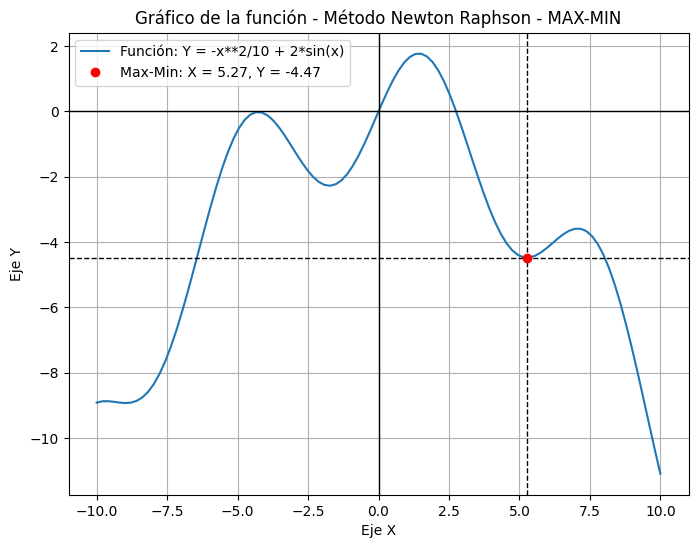

In [ ]:
# Ingresando parametros
'''
funcion_str = input("Ingresa la función (Utiliza 'x' como variable independiente, y la notación Ejm: 2*sin(x)-x**2/10 )")
a = float(input("Ingresa el valor del punto inicial 'a': "))
'''
# Parámetros por defecto. Borre en caso que quiera ingresar otra función
funcion_str = "2*sin(x)-x**2/10"
a=5

error = 1e-6
num_iteraciones = 100

try:

  resultados = Newton_Raphson_max_min(a, funcion_str, error, num_iteraciones)

except Exception as e:
    print("Hubo un error al realizar las operaciones:", e)


### Datos recopilados

----------DATOS RECOPILADOS--------------


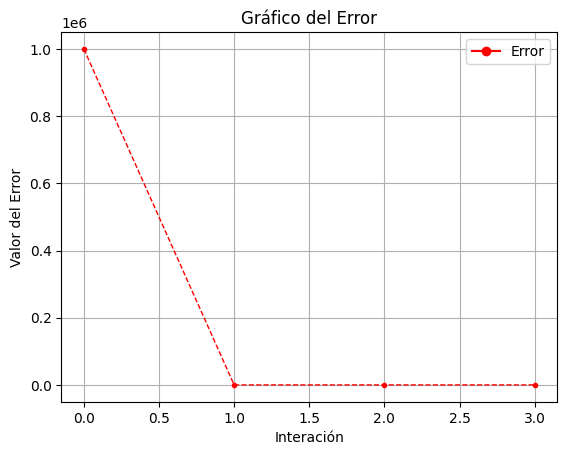

,Iteración,x,f(x),'f(x),''f(x),Error
0,1.0,5.000000,-4.41785,-0.43268,1.71785,1000000.000000
1,2.0,5.251873,-4.47416,-0.02299,1.51595,0.002879
2,3.0,5.267038,-4.47434,-0.00012,1.50017,0.000015
3,4.0,5.267118,-4.47434,0.00000,1.50009,0.000000


In [ ]:
print("----------DATOS RECOPILADOS--------------")

# Gráfica del error
resultados=resultados.astype(float)
error_column = resultados['Error']
fig, ax = plt.subplots()
legend_line, = ax.plot([], [], '-o', color="red", label="Error")
error_column.plot(style='o', markersize=3, color="red")
error_column.plot(style='--', linewidth=1, color="red")
plt.xlabel('Interación')E
plt.ylabel('Valor del Error')
plt.title('Gráfico del Error')
plt.legend(handles=[legend_line])
plt.grid()
plt.show()

pd.set_option('display.max_rows', 10)
#resultados=resultados.round(2)
resultados



# ***Funciones Multivariable***
--------------------------------------------------------------------------------

## **Método de Optimización Multidimensional - Búsqueda aleatoria**

In [ ]:
def busqueda_aleatoria(a, b, c, d, funcion_str, num_iteraciones):

    # Símbolo de variable x y
    x, y = sp.symbols('x y')
    funcion = sp.sympify(funcion_str)

    iteracion_data = []
    f_maximo = -np.inf
    x_maximo = None
    y_maximo = None

    for i in range(num_iteraciones+1):

        # Busqueda aleatoria, mediante la generación de numeros random
        x_valor = a + (b - a) * np.random.rand()
        y_valor = c + (d - c) * np.random.rand()

        # Evaluar la función
        f_xy = funcion.subs({x: x_valor, y: y_valor})

        if f_xy > f_maximo:
            f_maximo = f_xy
            x_maximo = x_valor
            y_maximo = y_valor


    iteracion_data.append([i, x_maximo, y_maximo, f_maximo])

    print("\n\n--------------MÁXIMO ENCONTRADO--------------\n", "Coordenada X:", x_maximo, " Coordenada Y:", y_maximo)
    print("Con punto X Inferior", a)
    print("Con punto X Superior", b)
    print("Con punto Y Inferior", c)
    print("Con punto Y Superior", d, "\n\n")

    # --------------------------------- Gráfica en 3D ----------------------------------------------
    # Definir los límites de los ejes X y Y
    x_vals = np.linspace(-10, 10, 200)
    y_vals = np.linspace(-10, 10, 200)

    # Crear la cuadrícula de puntos en el plano, convirtiendo la función en una matriz de puntos
    x_grid, y_grid = np.meshgrid(x_vals, y_vals)
    funcion_numpy = sp.lambdify((x, y), funcion, 'numpy')
    funcion_numpy = funcion_numpy(x_grid, y_grid)
    z_grid = funcion_numpy

    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(projection='3d')
    ax.set_title('Gráfico de la función - Máximo Búsqueda aleatoria ')
    ax.plot([], [], ' ', label=f'Función: Y = {funcion_str}')

    # Trazar la superficie
    surface = ax.plot_surface(x_grid, y_grid, z_grid, rstride=5, cstride=5, cmap='viridis', edgecolor="black", linewidth=0.2, alpha=0.7) #El valor de alpha determina la opacidad de la maya

    # Trazar líneas para los ejes X, Y y Z
    ax.plot([x_grid.min(), x_grid.max()], [0, 0], [0, 0], color='red', label='Eje X', linestyle='--')  # Eje X
    ax.plot([0, 0], [y_grid.min(), y_grid.max()], [0, 0], color='green', label='Eje Y', linestyle='--')  # Eje Y
    ax.plot([0, 0], [0, 0], [z_grid.min(), z_grid.max()], color='blue', label='Eje Z', linestyle='--')  # Eje Z

    # Coordenada del máximo
    ax.scatter(x_maximo, y_maximo, f_maximo, color='red', marker='o', s=100, label=f"Máximo: X = {round(x_maximo, 2)}, Y = {round(y_maximo, 2)}, Z = {round(f_maximo, 2)}")

    # Agregar la barra de colores
    colorbar = fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10, pad=0.1)
    colorbar.ax.yaxis.set_label_position('left')
    colorbar.ax.set_ylabel('Elevación Z')

    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Eje Z')
    ax.legend(loc='upper left')
    plt.show()

    # -------------------------------Gráfica mediante un mapa de calor----------------------------------------------
    plt.figure(figsize=(8, 8))
    plt.title('Gráfico de la función - Mapa de calor - Máximo Búsqueda aleatoria\n')
    plt.plot([], [], ' ', label=f'Función: Y = {funcion_str}')
    plt.imshow(funcion_numpy, extent=[x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()], origin='lower', cmap='viridis')
    plt.colorbar(label='Valor de la función en Z', shrink=0.7, aspect=20)

    # Agregar líneas de contorno y líneas de los ejes
    contour_lines = plt.contour(x_grid, y_grid, funcion_numpy, colors='black', linestyles='-', linewidths=0.5)
    plt.clabel(contour_lines, inline=1, fontsize=8)
    plt.axhline(0, color='black', linewidth=0.7, linestyle='--')  # Línea del eje x
    plt.axvline(0, color='black', linewidth=0.7, linestyle='--')  # Línea del eje y

    # Coordenada del máximo
    plt.plot(x_maximo, y_maximo, '^', color='red', markersize=8, label=f"Máximo: X = {round(x_maximo, 2)}, Y = {round(y_maximo, 2)}, Z = {round(f_maximo, 2)}")

    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.legend()
    plt.show()

    # --------------------------Recopilando resultados-------------------
    columns = ["Numero de Iteraciones", "x", "y", "f(x, y)"]
    df = pd.DataFrame(iteracion_data, columns=columns)

    return df




--------------MÁXIMO ENCONTRADO--------------
 Coordenada X: -0.942734739340382  Coordenada Y: 1.4308740310444403
Con punto X Inferior -2
Con punto X Superior 2
Con punto Y Inferior 1
Con punto Y Superior 3 




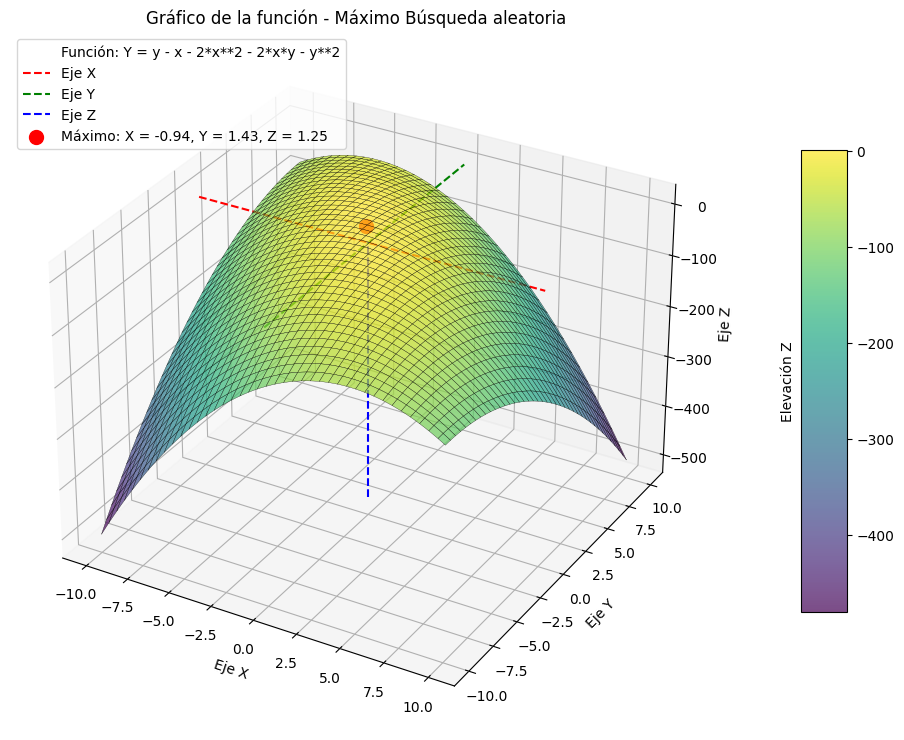

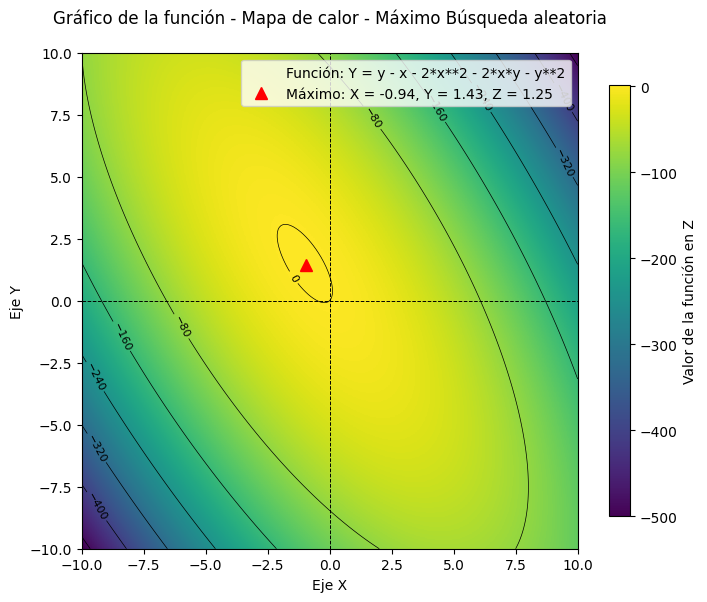

In [ ]:
# Ingresando parametros
'''
funcion_str = input("Ingresa la función (Utiliza 'x, y' como variables independientes, y la notación Ejm: y - x - 2*x**2 - 2*x*y - y**2 )")
a = float(input("Ingresa el valor del punto 'a' que corresponde al 'x' inferior: "))
b = float(input("Ingresa el valor del punto 'a' que corresponde al 'x' superior: "))
c = float(input("Ingresa el valor del punto 'a' que corresponde al 'y' inferior: "))
d = float(input("Ingresa el valor del punto 'a' que corresponde al 'y' superior: "))
num_iteraciones = float(input("Ingresa el numero de iteraciones "))
'''
# Parámetros por defecto. Borre en caso que quiera ingresar otra función
funcion_str = "y - x - 2*x**2 - 2*x*y - y**2"
a=-2
b=2
c=1
d=3
num_iteraciones = 1000

try:

  resultados = busqueda_aleatoria(a, b, c, d, funcion_str, num_iteraciones)

except Exception as e:
    print("Hubo un error al realizar las operaciones:", e)


### Datos recopilados

In [ ]:
print("----------DATOS RECOPILADOS--------------")
#resultados=resultados.round(2)
resultados


----------DATOS RECOPILADOS--------------


,Numero de Iteraciones,x,y,"f(x, y)"
0,1000,-0.986659,1.467032,1.24943680120459


### Con Gráfico 3D Interactivo

In [ ]:
# Límites de los ejes
x_vals = np.linspace(-10, 10, 200)
y_vals = np.linspace(-10, 10, 200)
x, y = np.meshgrid(x_vals, y_vals)

# Función
funcion = 2.25*x*y + 1.75*y - 1.5*x**2 - 2*y**2
z = funcion

def plot_surface(angle, elev):

    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(projection='3d')
    ax.set_title('Gráfico de la función - Máximo Búsqueda aleatoria ')
    ax.plot([], [], ' ', label=f'Función: Y = {funcion_str}')

    # Trazar la superficie
    surface = ax.plot_surface(x, y, z, rstride=5, cstride=5, cmap='viridis', edgecolor="black", linewidth=0.2, alpha=0.7) #El valor de alpha determina la opacidad de la maya

    # Trazar líneas para los ejes X, Y y Z
    ax.plot([x.min(), x.max()], [0, 0], [0, 0], color='red', label='Eje X', linestyle='--')  # Eje X
    ax.plot([0, 0], [y.min(), y.max()], [0, 0], color='green', label='Eje Y', linestyle='--')  # Eje Y
    ax.plot([0, 0], [0, 0], [z.min(), z.max()], color='blue', label='Eje Z', linestyle='--')  # Eje Z

    # Ajustar el tamaño de las etiquetas de los ejes
    ax.tick_params(axis='x', labelsize=5)
    ax.tick_params(axis='y', labelsize=5)
    ax.tick_params(axis='z', labelsize=5)

    # Coordenada del máximo
    coord_x = -1
    coord_y = 1.5
    coord_z = 1.3
    ax.scatter(coord_x, coord_y, coord_z, color='red', marker='o', s=100, label=f"Máximo: X = {round(coord_x, 2)}, Y = {round(coord_y, 2)}, Z = {round(coord_z, 2)}")

    # Agregar la barra de colores
    colorbar = fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10, pad=0.1)
    colorbar.ax.yaxis.set_label_position('left')
    colorbar.ax.set_ylabel('Elevación Z')

    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Eje Z')
    ax.legend(loc='upper left')

    # Ajusta ángulo de visión en ambos ejes
    ax.view_init(elev=elev, azim=angle)

    plt.show()

interact(plot_surface, angle=(0, 360, 10), elev=(0, 180, 10))


interactive(children=(IntSlider(value=180, description='angle', max=360, step=10), IntSlider(value=90, descrip…

<function __main__.plot_surface(angle, elev)>